In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Independent and dependent variables

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

### Train test split

In [5]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Fit the linear model

In [6]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Making predictions

In [7]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

### Model slope and intercept term

In [8]:
# Compute model slope and intercept

a = regressor.coef_
b = regressor.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [9345.94244312]
Estimated model intercept, b: (26816.19224403119,)


So, our fitted regression line is 

y = 9345.94244312*X + 26816.19224403119

That is our linear model.

In [9]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.round(2)})
df

,Real Values,Predicted Values
0,37731,40835.11
1,122391,123079.40
2,57081,65134.56
3,63218,63265.37
4,116969,115602.65
5,109431,108125.89
6,112635,116537.24
7,55794,64199.96
8,83088,76349.69
9,101302,100649.14


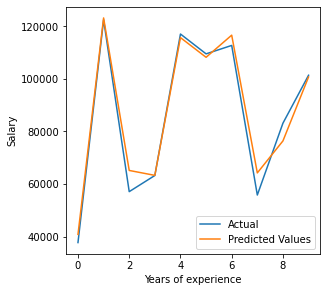

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(223)
plt.plot(df['Real Values'], label='Actual')
plt.plot(df['Predicted Values'],label='Predicted Values')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()

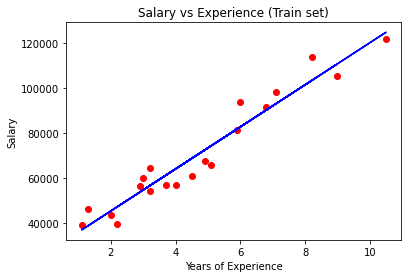

In [11]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

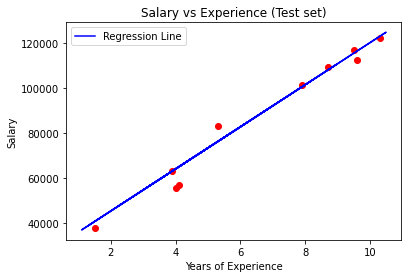

In [12]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue',  label='Regression Line')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Metrics for model performance

In [13]:
from sklearn.metrics import r2_score
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_test - y_pred)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_test - y_pred) **2 ))
print('R2-score: %.2f' % r2_score(y_test, y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) **2))
print("RMSE value: {:.2f}".format(rmse))

Mean absolute error: 3426.43
Residual sum of squares (MSE): 21026037.33
R2-score: 0.97
RMSE value: 4585.42


### Checking for Overfitting and Underfitting

In [14]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(regressor.score(X_train,y_train)))

print("Test set score: {:.4f}".format(regressor.score(X_test,y_test)))

Training set score: 0.9382
Test set score: 0.9749


### Exercise
    1. Predict salary of 5 years experience